In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [66]:
# data = sm.datasets.co2.load_pandas()
# y = data.data
df = pd.read_csv('dataset/Upperfinal.csv',usecols=["Date","LTP"])
df.index=df['Date']
df.head()
# df.describe()
# y=df
# print(y)

,Date,LTP
Date,,
2019/03/13,2019/03/13,239.0
2019/03/12,2019/03/12,245.0
2019/03/11,2019/03/11,235.0
2019/03/10,2019/03/10,230.0
2019/03/07,2019/03/07,230.0


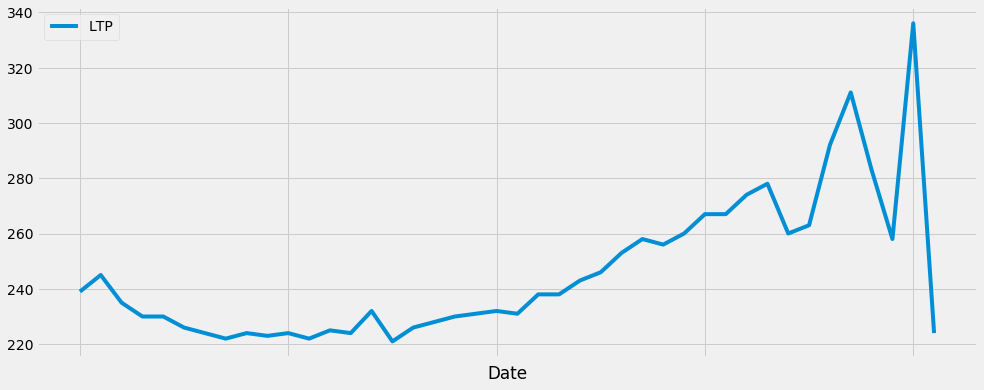

In [62]:
df.plot(figsize=(15, 6))
plt.show()

                 Date    LTP
Date                        
2019-03-13 2019-03-13  239.0
2019-03-12 2019-03-12  245.0
2019-03-11 2019-03-11  235.0
2019-03-10 2019-03-10  230.0
2019-03-07 2019-03-07  230.0


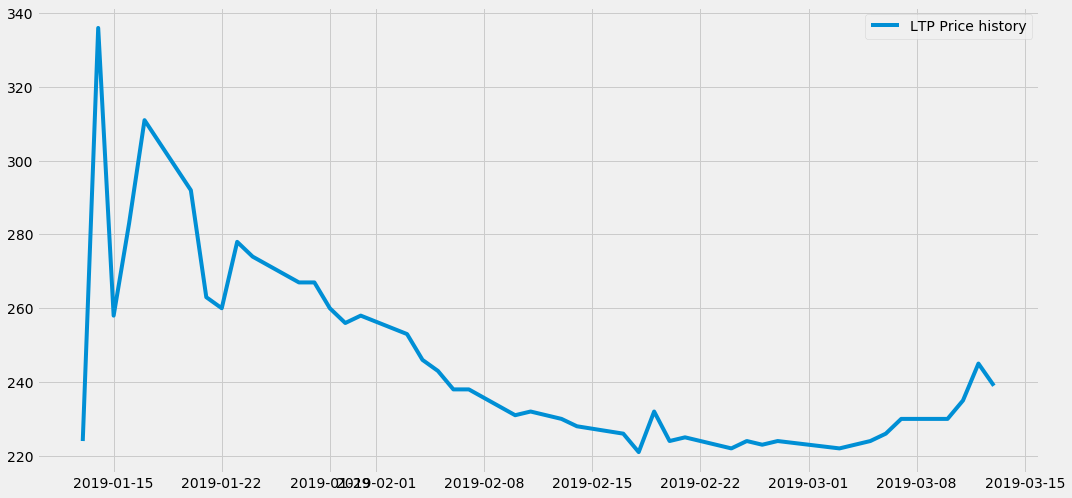

In [67]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
print(df.head())
#plot
plt.figure(figsize=(16,8))
plt.plot(df['LTP'], label='LTP Price history')
plt.legend()


In [68]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [70]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [73]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).